ValueError: x and y must have same first dimension, but have shapes (31,) and (30,)

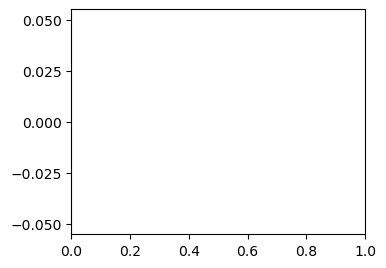

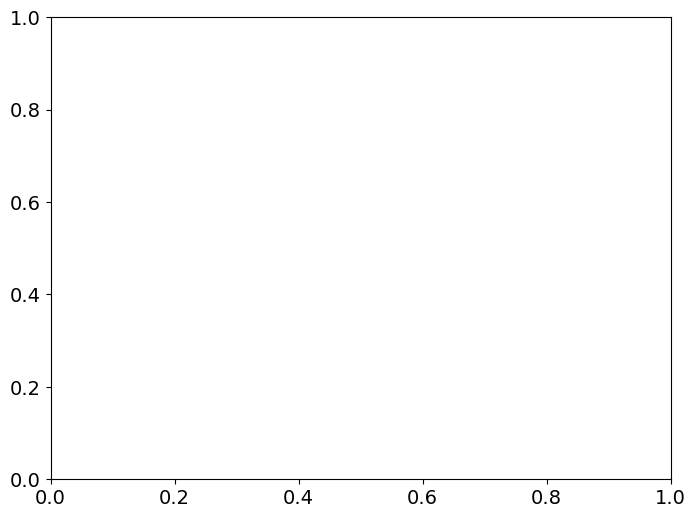

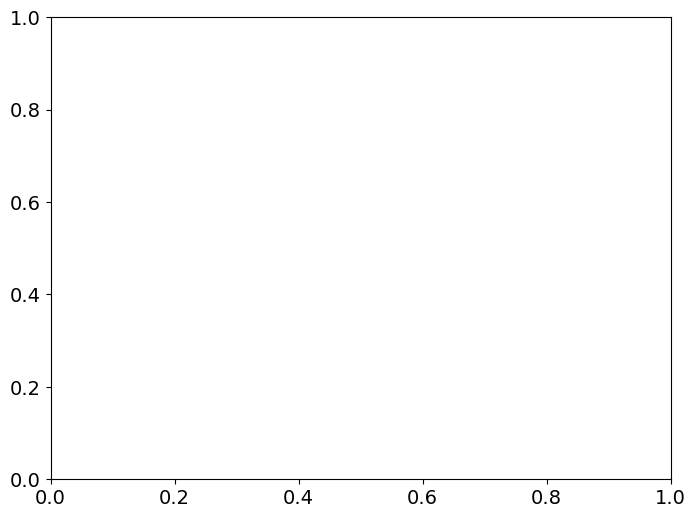

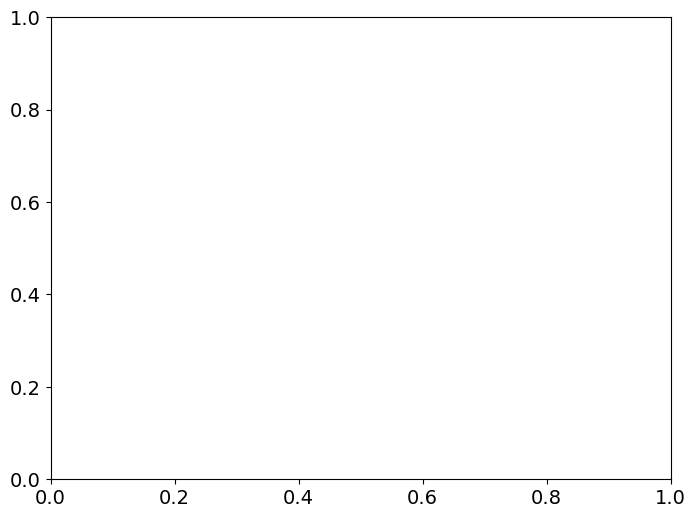

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.ticker as mtick
from cycler import cycler
import matplotlib.patches as patches

SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.locator_params(axis='y', nbins=5)
plt.tight_layout()
plt.subplots_adjust(left=0.5, bottom=0.5)
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

VA_type = "GMWB"
lapse_type = "nolapse"

save_path = f"./trainedModels/{VA_type}_PY/{lapse_type}/"

model_names = ["REG_LowNoise_L",
               "REG_LowNoise_Q", 
               "FNN_LoCap_LowNoise",
               "RNN_LoCap_LowNoise",
               "LSTM_LoCap_LowNoise"]

legend_names = ["MLR", "QPR", "FNN", "RNN", "LSTM"]

df_MSE = pd.DataFrame(index=["Training Error", "Test Error", "True Error", "Training Error SE", "Test Error SE", "True Error SE"],
                      columns=legend_names)

fig_ptm = plt.figure(figsize=(8, 6))
ax_ptm = fig_ptm.add_subplot(1, 1, 1)

fig_CVaR = plt.figure(figsize=(8, 6))
ax_CVaR = fig_CVaR.add_subplot(1, 1, 1)

fig_CVaR_2 = plt.figure(figsize=(8, 6))
ax_CVaR_2 = fig_CVaR_2.add_subplot(1, 1, 1)

default_cycler = (cycler(color=['tab:blue', 'tab:orange', 'tab:green', 'tab:purple',
                                'tab:grey', 'tab:brown', 'tab:pink', 'tab:gray']) +
                    cycler(linestyle=['-', '--', '-.', ':', '-', '--', '-.', ':']))

ax_ptm.set_prop_cycle(default_cycler)
ax_CVaR.set_prop_cycle(default_cycler)
ax_CVaR_2.set_prop_cycle(default_cycler)

start = 2500
end = 50000
step = (end - start) // 30
margin = (np.arange(start, end, step) / start - 1) * 0.05

for mdl, lgd in zip(model_names, legend_names):

    if "RNN" in mdl:
        cap = 50
        MSE_train = np.load(save_path + f"{mdl}_MSE_train.npy")[:cap]
        MSE_test = np.load(save_path + f"{mdl}_MSE_test.npy")[:cap]
        MSE = np.load(save_path + f"{mdl}_MSE.npy")[:cap]

        subset = np.where(MSE <= 0.15)
        MSE_train = MSE_train[subset]
        MSE_test = MSE_test[subset]
        MSE = MSE[subset]

        ptm = pd.read_csv(save_path + f"{mdl}_percent.csv").iloc[:, [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       18, 19, 20, 21, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34]]
        CVaR = pd.read_csv(save_path + f"{mdl}_CVaR.csv").iloc[:, [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       18, 19, 20, 21, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34]]

        df_MSE.loc["Training Error", lgd] = np.mean(MSE_train) / np.sqrt(50) * np.sqrt(ptm.shape[1]) 
        df_MSE.loc["Test Error", lgd] = np.mean(MSE_test)/ np.sqrt(50) * np.sqrt(ptm.shape[1]) 
        df_MSE.loc["True Error", lgd] = np.mean(MSE)/ np.sqrt(50) * np.sqrt(ptm.shape[1]) 
        df_MSE.loc["Training Error SE", lgd] = np.std(MSE_train)/ np.sqrt(50) * np.sqrt(ptm.shape[1]) 
        df_MSE.loc["Test Error SE", lgd] = np.std(MSE_test)/ np.sqrt(50) * np.sqrt(ptm.shape[1]) 
        df_MSE.loc["True Error SE", lgd] = np.std(MSE)/ np.sqrt(50) * np.sqrt(ptm.shape[1]) 

        ptm_mean = ptm.mean(axis=1)
        ptm_SE = ptm.std(axis=1) 
        ptm_upper = ptm.quantile(0.96, axis=1)
        ptm_lower = ptm.quantile(0.04,axis=1)

        ax_ptm.plot(margin, ptm_mean, label=lgd)
        ax_ptm.fill_between(margin, ptm_upper, ptm_lower, alpha=0.2)

        CVaR_mean = CVaR.mean(axis=1)
        CVaR_SE = CVaR.std(axis=1)
        CVaR_upper = CVaR.quantile(0.96, axis=1)
        CVaR_lower = CVaR.quantile(0.04, axis=1)

        ax_CVaR.plot(margin, CVaR_mean, label=lgd)
        ax_CVaR.fill_between(margin, CVaR_upper, CVaR_lower, alpha=0.2)
        ax_CVaR_2.plot(margin[margin>=0.075], CVaR_mean[margin>=0.075], label=lgd)
        ax_CVaR_2.fill_between(margin[margin>=0.075], CVaR_upper[margin>=0.075], CVaR_lower[margin>=0.075], alpha=0.2)

    elif "MLR" in lgd:
        MSE_train = np.load(save_path + f"{mdl}_MSE_train.npy")
        MSE_test = np.load(save_path + f"{mdl}_MSE_test.npy")
        MSE = np.load(save_path + f"{mdl}_MSE.npy")
        df_MSE.loc["Training Error", lgd] = np.mean(MSE_train)
        df_MSE.loc["Test Error", lgd] = np.mean(MSE_test)
        df_MSE.loc["True Error", lgd] = np.mean(MSE)
        df_MSE.loc["Training Error SE", lgd] = np.std(MSE_train)
        df_MSE.loc["Test Error SE", lgd] = np.std(MSE_test)
        df_MSE.loc["True Error SE", lgd] = np.std(MSE)

    else:
        MSE_train = np.load(save_path + f"{mdl}_MSE_train.npy")
        MSE_test = np.load(save_path + f"{mdl}_MSE_test.npy")
        MSE = np.load(save_path + f"{mdl}_MSE.npy")
        ptm = pd.read_csv(save_path + f"{mdl}_percent.csv")
        CVaR = pd.read_csv(save_path + f"{mdl}_CVaR.csv")

        df_MSE.loc["Training Error", lgd] = np.mean(MSE_train)
        df_MSE.loc["Test Error", lgd] = np.mean(MSE_test)
        df_MSE.loc["True Error", lgd] = np.mean(MSE)
        df_MSE.loc["Training Error SE", lgd] = np.std(MSE_train)
        df_MSE.loc["Test Error SE", lgd] = np.std(MSE_test)
        df_MSE.loc["True Error SE", lgd] = np.std(MSE)

        ptm_mean = ptm.mean(axis=1)
        ptm_SE = ptm.std(axis=1)
        ptm_upper = ptm.quantile(0.96, axis=1)
        ptm_lower = ptm.quantile(0.04,axis=1)

        ax_ptm.plot(margin, ptm_mean, label=lgd)
        ax_ptm.fill_between(margin, ptm_upper, ptm_lower, alpha=0.2)

        CVaR_mean = CVaR.mean(axis=1)
        CVaR_SE = CVaR.std(axis=1)
        CVaR_upper = CVaR.quantile(0.96, axis=1)
        CVaR_lower = CVaR.quantile(0.04, axis=1)

        ax_CVaR.plot(margin, CVaR_mean, label=lgd)
        ax_CVaR.fill_between(margin, CVaR_upper, CVaR_lower, alpha=0.2)

        ax_CVaR_2.plot(margin[margin>=0.075], CVaR_mean[margin>=0.075], label=lgd)
        ax_CVaR_2.fill_between(margin[margin>=0.075], CVaR_upper[margin>=0.075], CVaR_lower[margin>=0.075], alpha=0.2)

ax_ptm.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
ax_ptm.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
ax_ptm.set_ylim([0.35, 1])
ax_ptm.set_xticks(np.arange(0, 0.16, 0.05))
ax_ptm.set_xlabel("Safety Margin")
ax_ptm.set_ylabel("Percent of Matches")
ax_ptm.legend()
ax_ptm.set_title("GMWB Proxy Performance")

CVaR_SNS = 226.9612
ax_CVaR.axhline(y=CVaR_SNS, color="grey", linewidth=2, linestyle="--", label="SNS (N=1000)")
ax_CVaR.fill_between(margin, 226.84389061, 227.11711366, alpha=0.2)
ax_CVaR_2.axhline(y=CVaR_SNS, color="grey", linewidth=2, linestyle="--", label="SNS (N=1000)")
ax_CVaR_2.fill_between(margin, 226.84389061, 227.11711366, alpha=0.2)

CVaR_True = 226.7733
ax_CVaR.axhline(y=CVaR_True, color="black", linewidth=2, linestyle="-", label="True CVaR")
ax_CVaR_2.axhline(y=CVaR_True, color="black", linewidth=2, linestyle="-", label="True CVaR")

rect = patches.Rectangle((0.075, 225), 0.074, 2.0, linewidth=1, edgecolor='tab:brown', facecolor='none')
ax_CVaR.add_patch(rect)

ax_CVaR.set_xticks(np.arange(0, 0.16, 0.05))
ax_CVaR.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax_CVaR.set_xlabel("Safety Margin")
ax_CVaR.set_ylabel("CVaR")
ax_CVaR.legend()
ax_CVaR.set_title("GMWB Proxy Performance")

ax_CVaR_2.set_xticks(np.arange(0.075, 0.16, 0.025))
ax_CVaR_2.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax_CVaR_2.set_xlim(0.075, 0.15)
ax_CVaR_2.set_ylim(225.0, 227.5)
ax_CVaR_2.set_xlabel("Safety Margin")
ax_CVaR_2.set_ylabel("CVaR")
ax_CVaR_2.legend()
ax_CVaR_2.set_title("GMWB Proxy Performance (Zoomed-in)")

fig_ptm.savefig(f"./figures/{VA_type}/percent_macro_100.png")
fig_CVaR.savefig(f"./figures/{VA_type}/CVaR_macro_100.png")




In [ ]:
fig_ptm.savefig(f"./figures/{VA_type}/percent_macro.png")
fig_CVaR.savefig(f"./figures/{VA_type}/CVaR_macro.png")
fig_CVaR_2.savefig(f"./figures/{VA_type}/CVaR_macro_zoomed.png")

print(df_MSE)
df_MSE.to_csv(f"./figures/{VA_type}/MSE_macro.csv")
